<div class="alert alert-info" role="alert">
    <center><h1 style="color:red;"><strong><font color = Green>Fitting BDT Model and Generate Future Short-Rates</font></strong></h1></center><br>
</div>
<br><br>
Team:

> Ren Yang  
> Peter Stefanowicz  
> Abhinav Adarsh  
> Pranav Atulya  
> Levi Wang

Contact with Questions:
>* [Email With Questions](mailto:ren.yang@rutgers.edu)


In [45]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt

In [46]:
# Extract the price of ZCBs(assume $1 FV) with maturity from 1-15 years,each has maturioty 0.5 years longer than the previous, 
# which gives u discount factors

# Extract volatility(assumed they are known) at each future points in time
DofT=pd.read_excel('Extra_Credit_Term_Structure.xlsx',header=None).to_numpy().reshape(-1)
vol=pd.read_excel('Extra_Credit_Voldat.xlsx',header=None).to_numpy().reshape(-1)

In [47]:
# label DofTs
DofT={i:DofT[int(i*2-1)] for i in np.arange(0.5,15.5,0.5)}

In [48]:
# assume each change in short rates is with a time step of 0.5
tau=np.sqrt(0.5)


# initilize R,the tree of short rates. R will be a list of lists who hold the nodes of the tree at a particular stage 
R=[]

In [62]:
# Solve for the initial r(0.5), given D(0.5)

def obj1(x): # solve for the initial R
    return 2*((1/DofT[0.5])-1)-x


# To gurantee each output list will be at the same length, fill the list with NaN besides the rate itself 
temp=list(fsolve(obj1,0.001))
for g in range(30-1):
        temp.append(np.nan)

# append the output list into R      
R.append(temp)


In [63]:
# growth the tree of ZCB price
# by discounting future possible ZCB prices within a given maturity 
# back to time 0, and set it equals the actual ZCB price now with same maturity,
# we will be able to solvbe for r-star, the top-most node at a particular stage. 

# for more info, checkout notes on BDT
def ZCBPriceTree(r_star,R,end_nodes,vol_index,D_index,tau):
    time_steps=end_nodes
    end_prices=[]
    previous_prices=[]
    for steps_back in range(time_steps):
        temp=[]
        for Node in range(end_nodes-steps_back):
            if (steps_back==0):
                if(Node==0):
                    end_prices.append(1/(1+(r_star/2)))
                else:
                    other_rates=r_star*math.exp(-Node*2*vol[vol_index]*tau)
                    end_prices.append(1/(1+other_rates/2))
            elif(steps_back==1):
                temp.append((0.5*end_prices[Node]+0.5*end_prices[Node+1])/(1+R[time_steps-2][Node]/2))
            else:
                temp.append((0.5*previous_prices[steps_back-2][Node]+0.5*previous_prices[steps_back-2][Node+1])/(1+R[time_steps-steps_back-1][Node]/2))
        if (steps_back!=0):
            previous_prices.append(temp)
    return previous_prices[-1][0]-DofT[D_index]   

In [64]:
# once we have r_star, we can grow tree of short rats. This function returns nodes of short rate at a particular stage.
def RateTree(ZCBPriceTree,initial_guess,R,end_nodes,vol_index,D_index,tau):
    r_star=fsolve(ZCBPriceTree,initial_guess,args=(R,end_nodes,vol_index,D_index,tau))[0]
    temp=[]
    for Node in range(end_nodes):
        if (Node==0):
            temp.append(r_star)
        else:
            temp.append(r_star*math.exp(-Node*2*vol[vol_index]*tau))
    
    for g in range(30-end_nodes):
        temp.append(np.nan)
    return temp

In [65]:
for i in range(29):
    R.append(RateTree(ZCBPriceTree,initial_guess=0.001,R=R,end_nodes=i+2,vol_index=i,D_index=(1+i/2),tau=tau))

In [66]:
Dic={i:R[int(i*2-1)] for i in np.arange(0.5,15.5,0.5)}

In [67]:
TreeDF=pd.DataFrame(Dic)

In [68]:
TreeDF

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0
0,0.056605,0.063270,0.072572,0.084125,0.098326,0.114152,0.129116,0.146041,0.162498,0.180818,...,0.425064,0.452156,0.479588,0.499425,0.526511,0.553723,0.581053,0.608522,0.636150,0.664007
1,NaN,0.054926,0.061245,0.069504,0.079532,0.091036,0.102679,0.115811,0.129226,0.144202,...,0.355183,0.378892,0.403017,0.421471,0.445588,0.469945,0.494537,0.519383,0.544502,0.569955
2,NaN,NaN,0.051685,0.057424,0.064330,0.072601,0.081655,0.091838,0.102767,0.115001,...,0.296791,0.317499,0.338672,0.355685,0.377102,0.398843,0.420902,0.443301,0.466057,0.489225
3,NaN,NaN,NaN,0.047444,0.052034,0.057899,0.064936,0.072828,0.081725,0.091713,...,0.247999,0.266053,0.284600,0.300168,0.319143,0.338498,0.358232,0.378364,0.398913,0.419930
4,NaN,NaN,NaN,NaN,0.042088,0.046175,0.051640,0.057752,0.064991,0.073141,...,0.207228,0.222944,0.239161,0.253315,0.270092,0.287284,0.304893,0.322940,0.341443,0.360449
5,NaN,NaN,NaN,NaN,NaN,0.036824,0.041067,0.045798,0.051684,0.058330,...,0.173160,0.186820,0.200976,0.213776,0.228580,0.243818,0.259496,0.275634,0.292252,0.309394
6,NaN,NaN,NaN,NaN,NaN,NaN,0.032658,0.036318,0.041102,0.046518,...,0.144692,0.156549,0.168888,0.180409,0.193448,0.206928,0.220858,0.235258,0.250148,0.265571
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028800,0.032686,0.037098,...,0.120905,0.131183,0.141924,0.152249,0.163716,0.175620,0.187973,0.200796,0.214110,0.227955
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025993,0.029586,...,0.101028,0.109927,0.119264,0.128485,0.138553,0.149049,0.159985,0.171382,0.183264,0.195666
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023595,...,0.084419,0.092115,0.100223,0.108430,0.117258,0.126498,0.136164,0.146278,0.156862,0.167952


In [69]:
# Expected short rate at each stages
avgrate={i:TreeDF.loc[:,i].mean() for i in np.arange(0.5,15.5,0.5)}

In [70]:
# expected short rates in the future reflects the term-structure at time0
avgrate

{0.5: 0.056604966803825096,
 1.0: 0.0590982410422379,
 1.5: 0.06183404928873671,
 2.0: 0.06462417888544594,
 2.5: 0.06726208310979158,
 3.0: 0.06978110301963773,
 3.5: 0.07196453571593465,
 4.0: 0.07439827174074928,
 4.5: 0.0769636486416501,
 5.0: 0.08000024866620963,
 5.5: 0.08341174711152158,
 6.0: 0.08705932442097875,
 6.5: 0.09082641137380079,
 7.0: 0.09466689992754439,
 7.5: 0.09853510581639545,
 8.0: 0.102409504506118,
 8.5: 0.10624919254761489,
 9.0: 0.11000850297597714,
 9.5: 0.11363405659038028,
 10.0: 0.11707188553201872,
 10.5: 0.12028795577522466,
 11.0: 0.12424597109958663,
 11.5: 0.12821062902620042,
 12.0: 0.13104920524941918,
 12.5: 0.13491277576630276,
 13.0: 0.13878353182431777,
 13.5: 0.14267413307930735,
 14.0: 0.14660414612464054,
 14.5: 0.15059131600140885,
 15.0: 0.1546638882717804}

In [71]:
# Calculate forward rate(T,0.5) from DofT

def FRate(DofT):
    ForwardRate=[0]
#     DT_point_five=DofT[0.5]
    for i in np.arange(0.5,15,0.5):
        ForwardRate.append(((DofT[i]/DofT[i+0.5])-1))
    return ForwardRate
    
ForwardRate=FRate(DofT)

In [72]:
BDTXaxis=[]
BDTYaxis=[]
for i in avgrate:
    BDTXaxis.append(i)
    BDTYaxis.append(avgrate[i])

Text(0, 0.5, 'BDT Expected Short Rate')

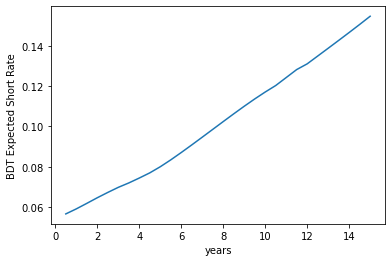

In [73]:
# Plot the expected short rate from BDT
plt.plot(BDTXaxis,BDTYaxis)
plt.xlabel('years')
plt.ylabel('BDT Expected Short Rate')


Text(0, 0.5, 'Forward Rates')

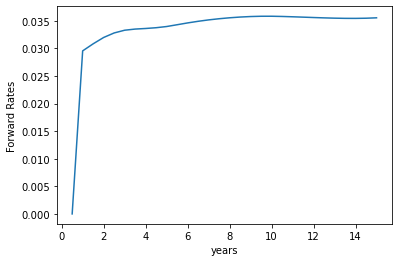

In [74]:
# Plot the Forward Rate
plt.plot(BDTXaxis,ForwardRate)
plt.xlabel('years')
plt.ylabel('Forward Rates')

#### By comparing the expected future short rates from BDT with the forward rate, both of them imply that the future 0.5 years rate is going to increase, while their shape are different. 